## IIBM Bootcamp 2025: Day 3 Afternoon

### Instructors Carlos Valle (cgvalle@uc.cl) and Nicolás Garrido (nagarrido@uc.cl)


This jupyter noteboook will cover the use of the NumPy and Matplotlib Python libraries and the Matlab equivalence. 

### Day Agenda:

***Morning***
1. Working with NumPy
    * Arrays
    * Vector operations
    * Matrix operations
    * point-wise operations
2. Working with Matplotlib
    * Anatomy of a figure
    * Fundamental principles of ploting library
    * Design of a figure
    * Types of figures
    
3. Introduction to Matlab
    * Understanding the GUI
    * Vectors and Matrix
    * Plots

    
***Afternoon***

4. Group Project
    * Working with real-world data


# 4. Group Project



The covid pandemic is still not over, and you are given the task to analyze it. You will plot and get general stats of the pandemic in this exercise for Python and Matlab languages. 

## 4.1 Python
Since you are going to use math operations and plots. Import the neccesary libraries

In [1]:
# Import the two necessary libraries
import numpy as np
from matplotlib import pyplot as plt


## Loading and preparing data
Let's now download the data and load it to colab. The data was downloaded from Github report of [MinCiencia](https://github.com/MinCiencia/Datos-COVID19)

In [2]:
# Downloading
!curl -O https://raw.githubusercontent.com/cgvalle/IIBM-BootCamp-2024/main/assets/D3/daily_cases.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9647  100  9647    0     0  10567      0 --:--:-- --:--:-- --:--:-- 10566


In [49]:
# Loading Data
with open('casos_nuevos.csv', 'r') as file:
    lines = file.read()
    lines = lines.split('\n')

# Formating data <TODO> (The final array of this section should be a numpy array)
lines = lines[1:]  # Let's remove header of the file

clean_data = []
for line in lines:
    day, cases = line.split(',')  # split divides the string in a list according to ','
    cases = int(cases)  # String to int
    clean_data.append(cases)

# The data is now in a list !
print(clean_data[:10])

# Transform list to numpy array
data = np.array(clean_data)
print(f"The the type of data is a numpya array: {type(data)}")


[1, 1, 2, 1, 1, 2, 3, 5, 2, 6]
The the type of data is a numpya array: <class 'numpy.ndarray'>


## Getting some useful information
Get the weekly mean and standar deviation of the number of new covid cases. **Use NumPy Arrays!!!**

In [50]:
# Weekly mean and std

# SOLUTION 1
weekly_mean = []
weekly_std = []

start_index = 0
end_index = 7
step = 7
while end_index < len(data):
    week = clean_data[start_index: end_index]
    mean = np.mean(week)
    std = np.std(week)
    
    weekly_mean.append(mean)
    weekly_std.append(std)
    
    start_index += step
    end_index += step
    
    
weekly_mean_1  = np.array(weekly_mean) # Mean
weekly_std_1   = np.array(weekly_std)  # std


# SOLUTION 2
weekly_mean = []
weekly_std = []

temp_clean_data = data  # New variable is defined to not lose the original array
while len(temp_clean_data) >= 7:
    week = temp_clean_data[0:7]  # Get the first 7 days
    mean = np.mean(week)
    std = np.std(week)
    
    weekly_mean.append(mean)
    weekly_std.append(std)
    
    temp_clean_data = temp_clean_data[7:]  # remove the first 7 days
    
weekly_mean_2  = np.array(weekly_mean) # Mean
weekly_std_2   = np.array(weekly_std)  # std


# weekly_mean_1 and weekly_mean_2 have the same values
weekly_mean_1 == weekly_mean_2


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

## Plots: Plot the daily cases
The plot must include the parameters:
* x and y labels
* title
* Line must be red
* add legend

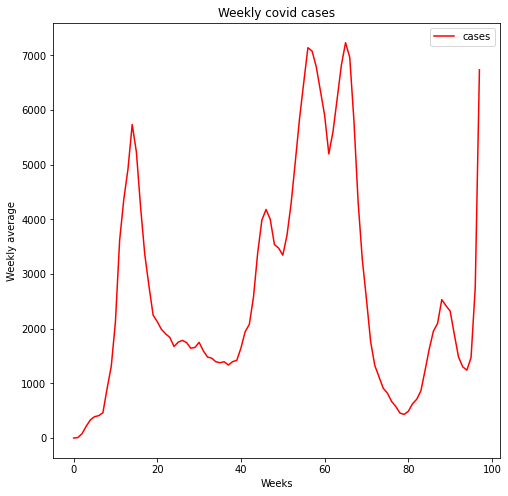

In [39]:
plt.figure(figsize=(8,8))
plt.plot(weekly_mean_1, color='red', label='cases')
plt.xlabel('Weeks')
plt.ylabel('Weekly average')
plt.title('Weekly covid cases')
plt.legend()
plt.show()

## Plots: Plot the daily cases
Including the paramters of the previous exercise, plot weekly and standar deviation in the same plot.

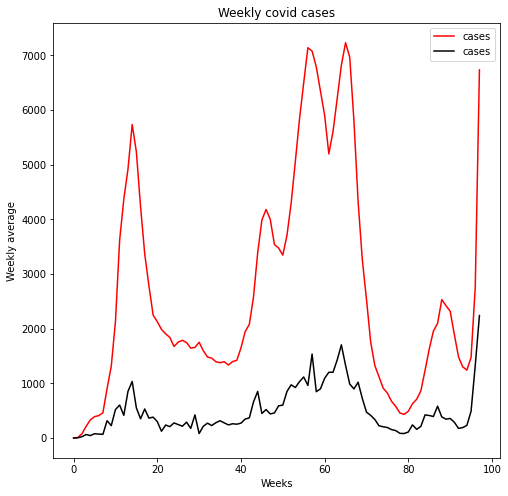

In [43]:
plt.figure(figsize=(8,8))
ax = plt.subplot(1,1,1)
ax.plot(weekly_mean_1, color='red', label='cases')
ax.plot(weekly_std_1, color='black', label='cases')

plt.xlabel('Weeks')
plt.ylabel('Weekly average')
plt.title('Weekly covid cases')
plt.legend()
plt.show()

## 4.2 Matlab
Repeate the same analysis on Matlab. With the command below download the data:

```R
url = "https://github.com/cgvalle/IIBM-BootCamp-2024/raw/main/assets/D3/daily_cases.mat"
websave('daily_cases.mat', url)
```

**HINT: You may want to search how to load .mat files!**

When you finish, please copy and paste your code here.

### weekly mean and std
```R
clc        % clears terminal
clear      % clears workspace variables
close all  % closes all open figures


data = load("daily_cases.mat");
data = data.dailycases ;

% SOLUTION 1
weekly_mean = [];
weekly_std = [];

start_index = 1;
end_index = 7;
step = 7;

cases = data(:, 2);

while end_index < length(cases)
    week = cases(start_index:end_index);
    
    mean_value = mean(week);
    std_value = std(week);
    
    weekly_mean = [weekly_mean; mean_value] ; 
    weekly_std = [weekly_std; std_value];
    
    start_index = start_index + step;
    end_index = end_index  + step;
    
end

weekly_mean_1 = weekly_mean;
weekly_std_1 = weekly_std;


% SOLUTION 2
weekly_mean = [];
weekly_std = [];

temp_cases = cases;
while length(temp_cases) >= 7
    week = temp_cases(1:7);  % Get the first 7 days
    
    mean_value = mean(week);
    std_value = std(week);
    
    weekly_mean = [weekly_mean; mean_value];
    weekly_std = [weekly_std; std_value];
    
    temp_cases = temp_cases(8:end) ; 
end

weekly_mean_2 =weekly_mean;
weekly_std_2 = weekly_std;


% weekly_mean_1 and weekly_mean_2 have the same values
weekly_mean_2 == weekly_mean_1

```

### Plot daily cases

```R
figure
plot(weekly_mean_1, color='r')
xlabel('Weeks')
ylabel('Weekly average')
legend('cases')
title('Weekly covid cases')
````

### Plot daily and std cases

```R
figure
hold on
plot(weekly_mean_1, color='r')
plot(weekly_std_1, color='black')
hold off
xlabel('Weeks')
ylabel('Weekly average')
legend('cases')
title('Weekly covid cases')
```



# 4. Don't forget to send your work!

Please don't forget to send your work to give you feedback about your progress to this [form](https://forms.gle/sME7JXuoB4ztMCFq6). To send it, you need to download the Notebook from Colab's webpage and upload it in the last question of the form.
